PSK

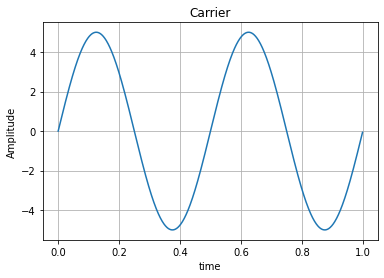

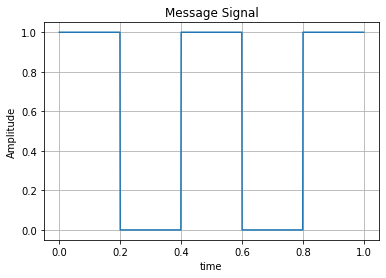

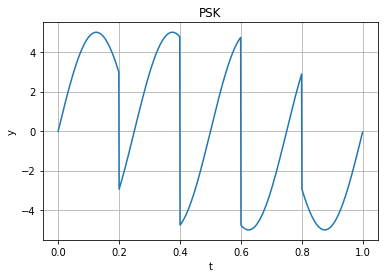

'Enter the frequency of carrier=10\nEnter the frequency of pulse=2'

In [1]:
import matplotlib.pyplot as plt
import numpy as num
A=5;
t=num.arange(0,1,0.001)
#print(t)
f1=int(input('Carrier Sine wave frequency ='))
f2=int(input('Message frequency ='))
x=A*num.sin(2*num.pi*f1*t)

plt.plot(t,x);
plt.xlabel("time");
plt.ylabel("Amplitude");
plt.title("Carrier");
plt.grid(True)
plt.show()

u=[]#Message signal
b=[0.2,0.4,0.6,0.8,1.0]
s=1
for i in t:
    if(i==b[0]):
        b.pop(0)
        if(s==0):
            s=1
        else:
            s=0
        #print(s,i,b)
    u.append(s)

#print(u)

plt.plot(t,u)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Message Signal')
plt.grid(True)
plt.show()

v=[]#Sine wave multiplied with square wave
for i in range(len(t)):
    if(u[i]==1):
        v.append(A*num.sin(2*num.pi*f1*t[i]))
    else:
        v.append(A*num.sin(2*num.pi*f1*t[i])*-1)

plt.plot(t,v);
#plt.axis([0 1 -6 6]);
plt.xlabel("t");
plt.ylabel("y");
plt.title("PSK");
plt.grid(True)
plt.show()
'''Enter the frequency of carrier=10
Enter the frequency of pulse=2'''

ASK

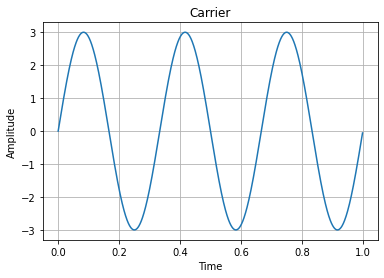

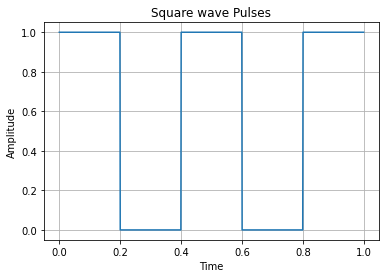

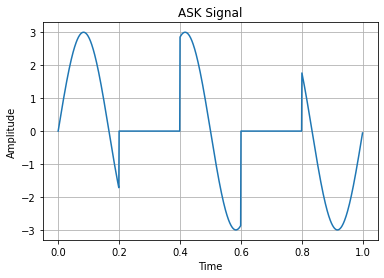

'\nsample input ---\nEnter the frequency of carrier=10\nEnter the frequency of pulse=2\n'

In [2]:
import matplotlib.pylab as plt
import numpy as num

F1=int(input('Enter the frequency of carrier='))
F2=int(input('Enter the frequency of pulse='))

A=3;#Amplitude
t=num.arange(0,1,0.001)
x=A*num.sin(2*num.pi*F1*t)#Carrier Sine wave
u=[]#Message signal
b=[0.2,0.4,0.6,0.8,1.0]
s=1
for i in t:
    if(i==b[0]):
        b.pop(0)
        if(s==0):
            s=1
        else:
            s=0
        #print(s,i,b)
    u.append(s)
v=[]#Sine wave multiplied with square wave
for i in range(len(t)):
    v.append(A*num.sin(2*num.pi*F1*t[i])*u[i])
    

plt.plot(t,x);
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.title('Carrier');
plt.grid(True)
plt.show()

plt.plot(t,u)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Square wave Pulses')
plt.grid(True)
plt.show()

plt.plot(t,v)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ASK Signal')
plt.grid(True)
plt.show()

'''
sample input ---
Enter the frequency of carrier=10
Enter the frequency of pulse=2
'''

Shannon Fano encoding

In [3]:
# Python3 program for Shannon Fano Algorithm


# declare structure node
class node :
	def __init__(self) -> None:
		# for storing symbol
		self.sym=''
		# for storing probability or frequency
		self.pro=0.0
		self.arr=[0]*20
		self.top=0
p=[node() for _ in range(20)]

# function to find shannon code
def shannon(l, h, p):
	pack1 = 0; pack2 = 0; diff1 = 0; diff2 = 0
	if ((l + 1) == h or l == h or l > h) :
		if (l == h or l > h):
			return
		p[h].top+=1
		p[h].arr[(p[h].top)] = 0
		p[l].top+=1
		p[l].arr[(p[l].top)] = 1
		
		return
	
	else :
		for i in range(l,h):
			pack1 = pack1 + p[i].pro
		pack2 = pack2 + p[h].pro
		diff1 = pack1 - pack2
		if (diff1 < 0):
			diff1 = diff1 * -1
		j = 2
		while (j != h - l + 1) :
			k = h - j
			pack1 = pack2 = 0
			for i in range(l, k+1):
				pack1 = pack1 + p[i].pro
			for i in range(h,k,-1):
				pack2 = pack2 + p[i].pro
			diff2 = pack1 - pack2
			if (diff2 < 0):
				diff2 = diff2 * -1
			if (diff2 >= diff1):
				break
			diff1 = diff2
			j+=1
		
		k+=1
		for i in range(l,k+1):
			p[i].top+=1
			p[i].arr[(p[i].top)] = 1
			
		for i in range(k + 1,h+1):
			p[i].top+=1
			p[i].arr[(p[i].top)] = 0
			

		# Invoke shannon function
		shannon(l, k, p)
		shannon(k + 1, h, p)
	


# Function to sort the symbols
# based on their probability or frequency
def sortByProbability(n, p):
	temp=node()
	for j in range(1,n) :
		for i in range(n - 1) :
			if ((p[i].pro) > (p[i + 1].pro)) :
				temp.pro = p[i].pro
				temp.sym = p[i].sym

				p[i].pro = p[i + 1].pro
				p[i].sym = p[i + 1].sym

				p[i + 1].pro = temp.pro
				p[i + 1].sym = temp.sym
			
		
	


# function to display shannon codes
def display(n, p):
	print("\n\n\n\tSymbol\tProbability\tCode",end='')
	for i in range(n - 1,-1,-1):
		print("\n\t", p[i].sym, "\t\t", p[i].pro,"\t",end='')
		for j in range(p[i].top+1):
			print(p[i].arr[j],end='')
	


# Driver code
if __name__ == '__main__':
	total = 0

	# Input number of symbols
	print("Enter number of symbols\t: ",end='')
	n = 5
	print(n)
	i=0
	# Input symbols
	for i in range(n):
		print("Enter symbol", i + 1," : ",end="")
		ch = chr(65 + i)
		print(ch)

		# Insert the symbol to node
		p[i].sym += ch
	

	# Input probability of symbols
	x = [0.22, 0.28, 0.15, 0.30, 0.05]
	for i in range(n):
		print("\nEnter probability of", p[i].sym, ": ",end="")
		print(x[i])

		# Insert the value to node
		p[i].pro = x[i]
		total = total + p[i].pro

		# checking max probability
		if (total > 1) :
			print("Invalid. Enter new values")
			total = total - p[i].pro
			i-=1
		
	
	i+=1
	p[i].pro = 1 - total
	# Sorting the symbols based on
	# their probability or frequency
	sortByProbability(n, p)

	for i in range(n):
		p[i].top = -1

	# Find the shannon code
	shannon(0, n - 1, p)

	# Display the codes
	display(n, p)

Enter number of symbols	: 5
Enter symbol 1  : A
Enter symbol 2  : B
Enter symbol 3  : C
Enter symbol 4  : D
Enter symbol 5  : E

Enter probability of A : 0.22

Enter probability of B : 0.28

Enter probability of C : 0.15

Enter probability of D : 0.3

Enter probability of E : 0.05



	Symbol	Probability	Code
	 D 		 0.3 	00
	 B 		 0.28 	01
	 A 		 0.22 	10
	 C 		 0.15 	110
	 E 		 0.05 	111